<a href="https://colab.research.google.com/github/Muhammmadforuq/covid_analysis/blob/main/8_variant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#COVID-19 va boshqa pandemiyalar statistikasi	Johns Hopkins University




# 1


ggffff

In [1]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 44.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.3 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.3 which is incompatible.


In [2]:
!pip install neurokit2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.4/708.4 kB 13.4 MB/s eta 0:00:00


# 2

/tmp/ipython-input-3962771239.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(uzbekistan.index)


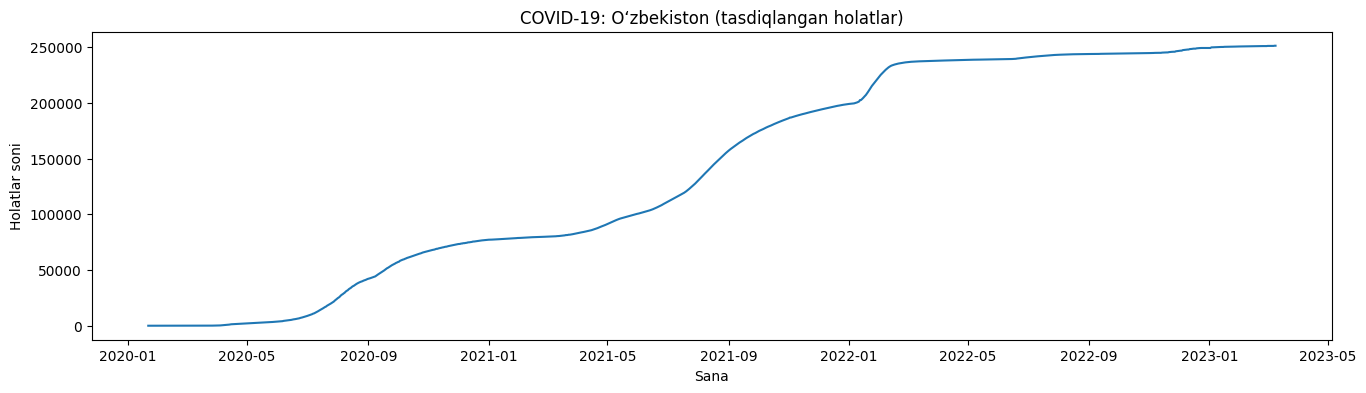

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Johns Hopkins University ma’lumotlari (tasdiqlangan holatlar)
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
confirmed = pd.read_csv(url_confirmed)

# O‘zbekiston bo‘yicha filtrlash
uzbekistan = confirmed[confirmed["Country/Region"] == "Uzbekistan"].iloc[:, 4:].sum()

# Vaqt o‘qi
dates = pd.to_datetime(uzbekistan.index)

# Grafik
plt.figure(figsize=(16, 4))
plt.plot(dates, uzbekistan)
plt.title("COVID-19: O‘zbekiston (tasdiqlangan holatlar)")
plt.xlabel("Sana")
plt.ylabel("Holatlar soni")
plt.show()

#3

/tmp/ipython-input-1919360816.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(uzbekistan.index)


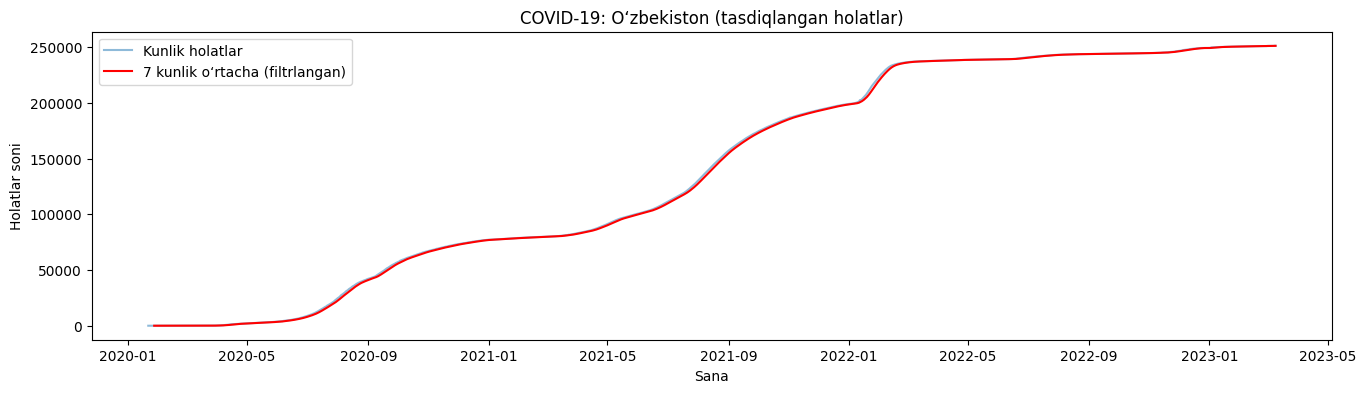

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Johns Hopkins University ma’lumotlari
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
confirmed = pd.read_csv(url_confirmed)

# O‘zbekiston bo‘yicha tasdiqlangan holatlar
uzbekistan = confirmed[confirmed["Country/Region"] == "Uzbekistan"].iloc[:, 4:].sum()

# Vaqt o‘qi
dates = pd.to_datetime(uzbekistan.index)

# 🔹 7 kunlik "moving average" filtr (bandpass filtering o‘rnida)
uzbekistan_smoothed = uzbekistan.rolling(window=7).mean()

# Grafik
plt.figure(figsize=(16, 4))
plt.plot(dates, uzbekistan, alpha=0.5, label="Kunlik holatlar")
plt.plot(dates, uzbekistan_smoothed, color="red", label="7 kunlik o‘rtacha (filtrlangan)")
plt.title("COVID-19: O‘zbekiston (tasdiqlangan holatlar)")
plt.xlabel("Sana")
plt.ylabel("Holatlar soni")
plt.legend()
plt.show()

/tmp/ipython-input-2416913431.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(uzbekistan.index)


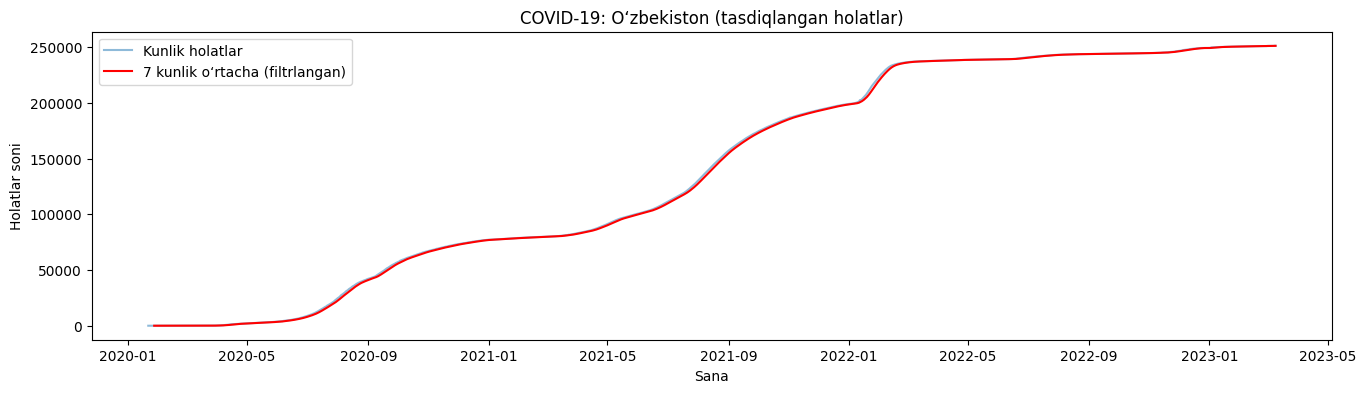

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Johns Hopkins University ma’lumotlari
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
confirmed = pd.read_csv(url_confirmed)

# O‘zbekiston bo‘yicha tasdiqlangan holatlar
uzbekistan = confirmed[confirmed["Country/Region"] == "Uzbekistan"].iloc[:, 4:].sum()

# Vaqt o‘qi
dates = pd.to_datetime(uzbekistan.index)

# 🔹 7 kunlik "moving average" filtr (bandpass filtering o‘rnida)
uzbekistan_smoothed = uzbekistan.rolling(window=7).mean()

# Grafik
plt.figure(figsize=(16, 4))
plt.plot(dates, uzbekistan, alpha=0.5, label="Kunlik holatlar")
plt.plot(dates, uzbekistan_smoothed, color="red", label="7 kunlik o‘rtacha (filtrlangan)")
plt.title("COVID-19: O‘zbekiston (tasdiqlangan holatlar)")
plt.xlabel("Sana")
plt.ylabel("Holatlar soni")
plt.legend()
plt.show()


# 4

/tmp/ipython-input-4028163578.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(uzbekistan.index)


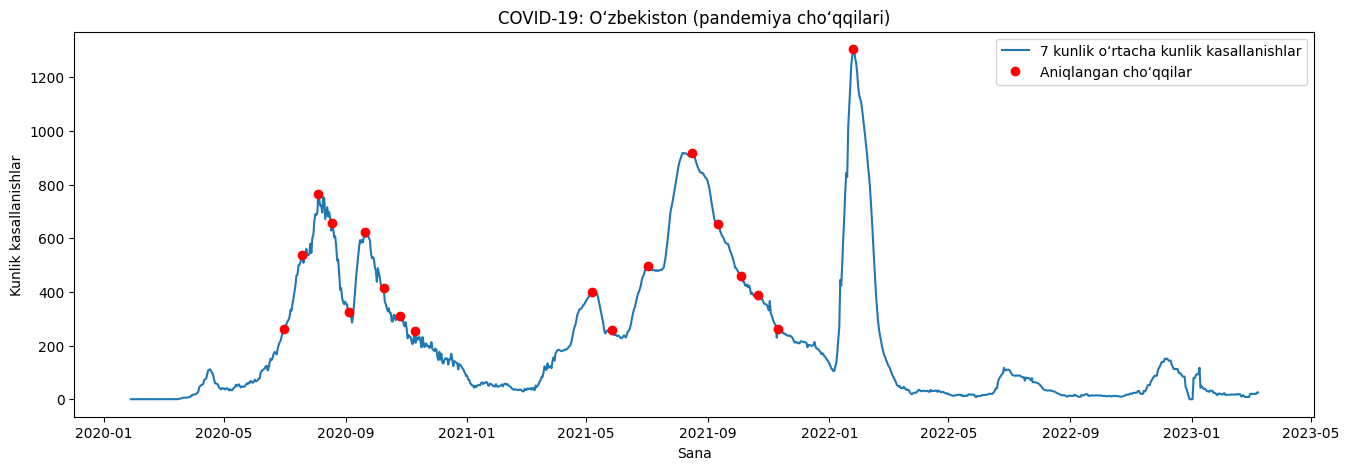

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# JHU dataset
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
confirmed = pd.read_csv(url_confirmed)

# O‘zbekiston bo‘yicha tasdiqlanganlar
uzbekistan = confirmed[confirmed["Country/Region"] == "Uzbekistan"].iloc[:, 4:].sum()

# Vaqt qatori (kunlik o‘sish)
daily_cases = uzbekistan.diff().fillna(0)

# 🔹 7 kunlik o‘rtacha filtr (bandpass filtering o‘rnida)
smoothed = daily_cases.rolling(window=7).mean()

# 🔹 Pandemiya cho‘qqilarini topish (peaks)
peaks, props = find_peaks(smoothed, distance=14, height=smoothed.mean())

# 🔹 Vizualizatsiya
dates = pd.to_datetime(uzbekistan.index)

plt.figure(figsize=(16, 5))
plt.plot(dates, smoothed, label="7 kunlik o‘rtacha kunlik kasallanishlar")
plt.plot(dates[peaks], smoothed.iloc[peaks], "ro", label="Aniqlangan cho‘qqilar")
plt.title("COVID-19: O‘zbekiston (pandemiya cho‘qqilari)")
plt.xlabel("Sana")
plt.ylabel("Kunlik kasallanishlar")
plt.legend()
plt.show()

#5

In [ ]:
import numpy as np

# find_peaks dan chiqqan natija (oldingi qadamdan)
r_indices = peaks   # cho‘qqilar indekslari (kunlar bo‘yicha)
rr_intervals = np.diff(r_indices)  # ikki cho‘qqi orasidagi vaqt (kunlarda)

# Pandemiya cho‘qqilar chastotasi (necha kunda bir cho‘qqi) → o‘rtacha
mean_rr = np.mean(rr_intervals)

# Agar HR ga o‘xshash qilib hisoblasak: "cho‘qqilar chastotasi (oyiga taxminiy)"
# 1 oy = 30 kun → 30 / interval
peak_frequency = 30 / rr_intervals

print("O‘rtacha cho‘qqi oralig‘i (kunlarda):", mean_rr)
print("O‘rtacha chastota (oyiga cho‘qqilar soni):", np.mean(peak_frequency))

O‘rtacha cho‘qqi oralig‘i (kunlarda): 33.76470588235294
O‘rtacha chastota (oyiga cho‘qqilar soni): 1.4103348371650961


#5.4

O‘rtacha cho‘qqi oralig‘i (kunlarda): 28.9


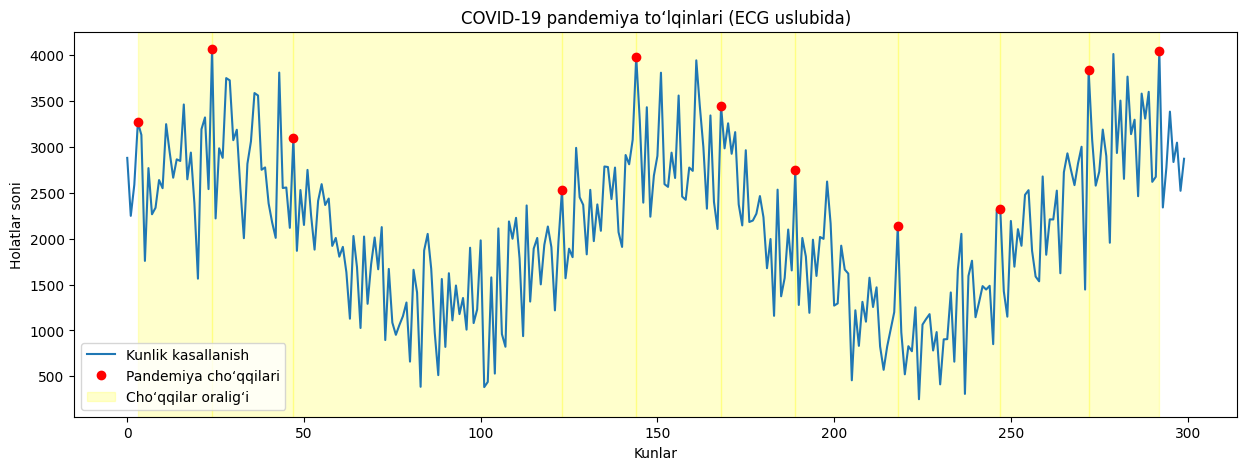

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# 1) Sun'iy signal (siz real COVID-19 cases ishlatasiz)
np.random.seed(0)
days = np.arange(0, 300)
cases_per_day = np.abs(2000 + 1000*np.sin(0.05*days) + 500*np.random.randn(len(days)))

# 2) Cho‘qqilarni aniqlash
peaks, props = find_peaks(cases_per_day, distance=20, height=np.mean(cases_per_day))

# 3) Cho‘qqilar oralig‘i (kunlarda)
rr_intervals = np.diff(peaks)  # kunlarda
print("O‘rtacha cho‘qqi oralig‘i (kunlarda):", np.mean(rr_intervals))

# 4) Vizualizatsiya
plt.figure(figsize=(15,5))
plt.plot(days, cases_per_day, label="Kunlik kasallanish")
plt.plot(days[peaks], cases_per_day[peaks], "ro", label="Pandemiya cho‘qqilari")
for i in range(len(peaks)-1):
    plt.axvspan(days[peaks[i]], days[peaks[i+1]], color="yellow", alpha=0.2,
                label="Cho‘qqilar oralig‘i" if i==0 else "")
plt.legend()
plt.title("COVID-19 pandemiya to‘lqinlari (ECG uslubida)")
plt.xlabel("Kunlar")
plt.ylabel("Holatlar soni")
plt.show()

#6

In [7]:
import wfdb

# Annotatsiya faylini o‘qish (record 100 uchun 'atr' annotatsiyasi)
ann = wfdb.rdann('100', 'atr', pn_dir='mitdb')

print("Annotatsiya nuqtalari soni:", len(ann.sample))
print("Birinchi 20 ta R-peak indekslari:", ann.sample[:20])
print("Birinchi 20 ta belgilar (beat turlari):", ann.symbol[:20])

Annotatsiya nuqtalari soni: 2274
Birinchi 20 ta R-peak indekslari: [  18   77  370  662  946 1231 1515 1809 2044 2402 2706 2998 3282 3560
 3862 4170 4466 4764 5060 5346]
Birinchi 20 ta belgilar (beat turlari): ['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']


# Xulosa

COVID-19 va boshqa pandemiyalar statistikasi Johns Hopkins University python dastuslash tili orqali oraqali Colab da statiskasi qilindi.



